Importation des librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

1. Chargez le jeu de données Iris à partir de scikit-learn.
2. Créez un DataFrame à partir des données, avec 6 colonnes : les 4 attributs des données, le numéro associé à l'espèce et le nom de d'espèce.
3. Combien de spécimens sont décrits dans le jeu de données Iris ? Quelle est la largeur de pétales moyenne ? La longueur maximale ? (vous pouvez obtenir toutes ces informations avec 2 lignes de code)

In [ ]:
# 1
iris = datasets.load_iris()
feature_names = iris.feature_names
target_names = iris.target_names

# 2
df = pd.DataFrame(iris.data, columns=feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

# 3
print(df.shape)
df.describe()

df.head()

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


4. Le jeu de données est-il équilibré ?

In [ ]:
df['species_name'].value_counts()

,count
species_name,
setosa,50
versicolor,50
virginica,50


5. Utilisez Seaborn pour visualiser les distributions de chaque attribut et les relations entre chaque paire d'attributs selon l'espèce. Quelles espèces seront plus difficiles à catégoriser ?

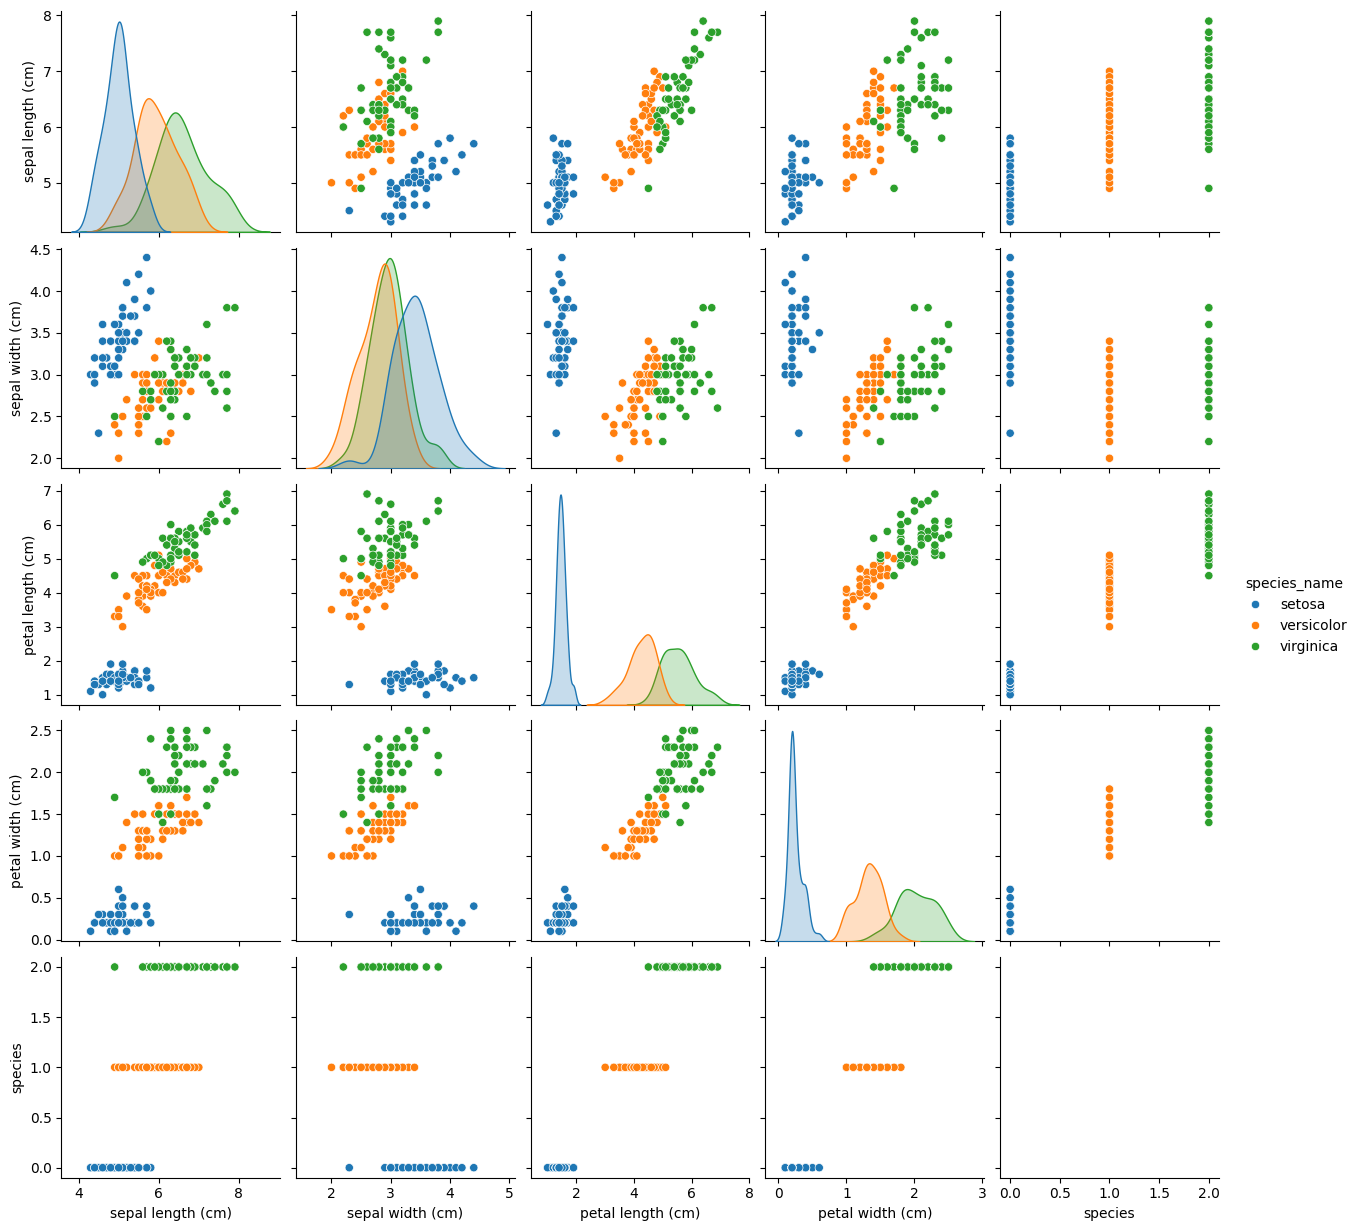

In [ ]:
sns.pairplot(df, hue='species_name')
plt.show()

6. Normalisez les données.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

7. Selon ce que vous connaissez des donnéees, combien de clusters utiliserons-nous ?
8. Effectuez le clustering par un algorithme de K-means et ajoutez les prédictions obtenues au DataFrame Iris.
9. Utilisez un algorithme de PCA pour réduire la dimension des données afin de visualiser les prédictions.
10. Créez un DataFrame à partir du résultat de l'algorithme de PCA, des clusters et des espèces.

In [ ]:
# 7
k = 3

# 8
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# 9
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 10
vis_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
vis_df['Cluster'] = df['cluster']
vis_df['Species'] = df['species']
vis_df['Espèce'] = df['species_name']

vis_df.head()

,PC1,PC2,Cluster,Species,Espèce
0,-2.264703,0.480027,1,0,setosa
1,-2.080961,-0.674134,1,0,setosa
2,-2.364229,-0.341908,1,0,setosa
3,-2.299384,-0.597395,1,0,setosa
4,-2.389842,0.646835,1,0,setosa


11. Visualisez les clusters créés, puis la distribution réelle des espèces dans l'espace 2d créé par PCA.

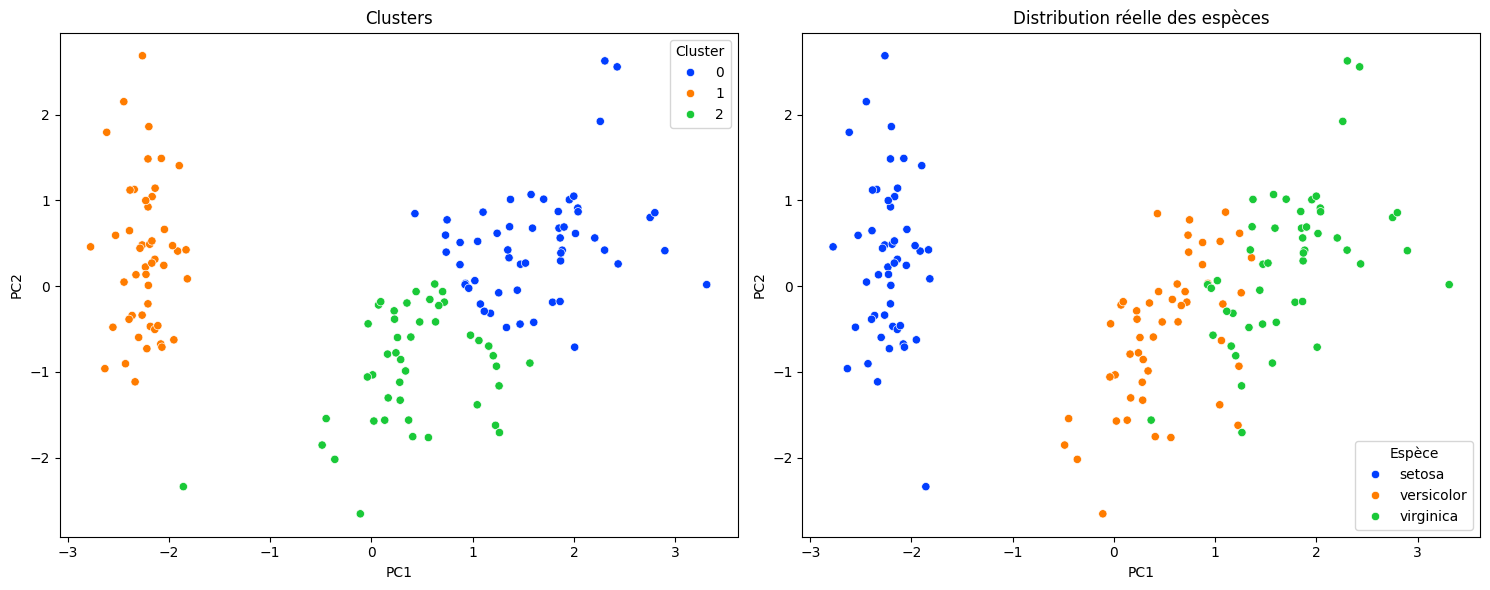

In [ ]:
# 11
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=vis_df, x='PC1', y='PC2', hue='Cluster', palette='bright', ax=ax1)
ax1.set_title('Clusters')

sns.scatterplot(data=vis_df, x='PC1', y='PC2', hue='Espèce', palette='bright', ax=ax2)
ax2.set_title('Distribution réelle des espèces')

plt.tight_layout()
plt.show()


12. Si le nombre de clusters à utiliser n'était pas déjà connu, comment peut-on trouver un nombre de clusters optimal ?
13. Utilisez cette méthode pour un nombre de clusters allant de 1 à 10, avec une visualisation. Vérifiez que vous trouvez bien k=3 comme optimal.

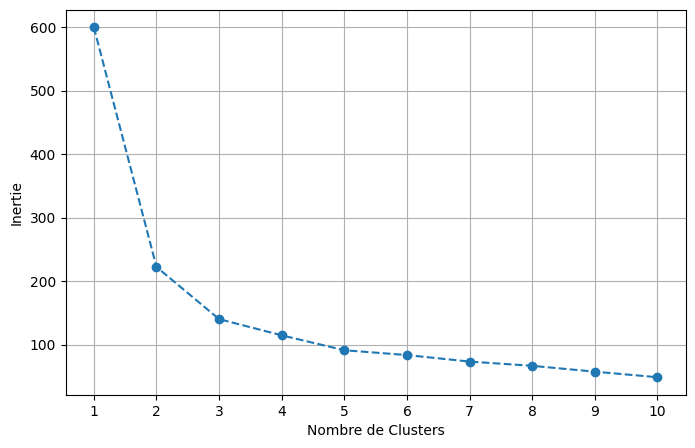

In [ ]:
# 13
inertia = []
possible_k = range(1, 11)

for k in possible_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(possible_k, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.xticks(possible_k)
plt.grid(True)
plt.show()

14. Comparez la précision et la vitesse du clustering par K-means avec d'autres [algorithmes de clustering](https://scikit-learn.org/stable/modules/clustering.html).
15. Comparez la précision et la vitesse du clustering par K-means sur [d'autres](https://scikit-learn.org/stable/datasets/toy_dataset.html) [jeux de données](https://seaborn.pydata.org/generated/seaborn.load_dataset.html).

# Pour aller plus loin

- [freeCodeCamp](https://www.freecodecamp.org/learn/machine-learning-with-python) (en anglais) : cours de Machine Learning
- Kaggle (en anglais) :    
  - [Cours](https://www.kaggle.com/learn)
  - [Apprentissage par la pratique : compétitions](https://www.kaggle.com/competitions?sortOption=default&hostSegmentIdFilter=5)